# Quantitative Data Analysis (Notebook)

This notebook performs the exercises: descriptive statistics, hypothesis tests, correlation/regression, multiple regression, ANOVA, chi-square tests, and visualization using the CSV files in the `data/` folder. Outputs (plots and text summaries) are saved to `outputs/`.

---
## Setup: Install & import required libraries

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For nicer plots in notebook
sns.set(style='whitegrid')

# Setup note
This cell installed and imported required libraries (pandas, numpy, matplotlib, seaborn, scipy, statsmodels). The kernel is ready for computations and plotting. If you encounter missing-package errors, run `pip install -r requirements.txt` in the project environment.

In [20]:
OUT_DIR = 'outputs'
os.makedirs(OUT_DIR, exist_ok=True)
print('Outputs will be saved to', OUT_DIR)

Outputs will be saved to outputs


# Outputs location
This cell sets `OUT_DIR = 'outputs'` and creates the directory if needed. All generated PNGs and text summaries from later cells will be saved here.

---
## Descriptive statistics — Sales dataset
We compute mean, median, mode, variance, and standard deviation and plot a histogram.

Descriptive statistics for sales:
mean: 1100.6666666666667
median: 1080.0
mode: [870, 950, 980, 990, 1000, 1020, 1050, 1080, 1100, 1150, 1170, 1200, 1250, 1300, 1400]
variance: 20792.380952380954
std_dev: 144.19563430416662
count: 15


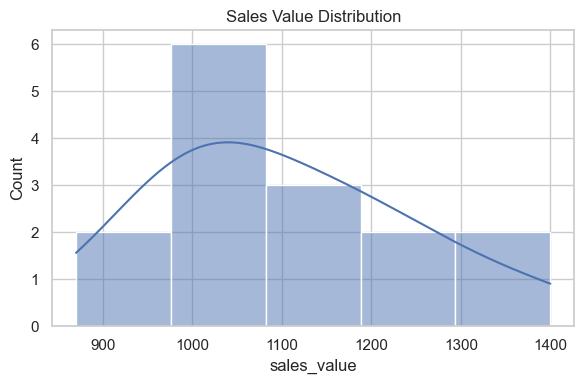

In [21]:
sales = pd.read_csv('data/sales.csv')
vals = sales['sales_value']
desc = {
    'mean': float(vals.mean()),
    'median': float(vals.median()),
    'mode': list(vals.mode()),
    'variance': float(vals.var(ddof=1)),
    'std_dev': float(vals.std(ddof=1)),
    'count': int(vals.count())
}
print('Descriptive statistics for sales:')
for k,v in desc.items():
    print(f'{k}: {v}')

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(vals, kde=True)
plt.title('Sales Value Distribution')
plt.xlabel('sales_value')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'sales_histogram.png'))
plt.show()

---
## Inferential Statistics — Tutoring t-test
Compare tutored vs non-tutored groups with Welch's t-test (two-sample, unequal variances).

Tutored mean: 88.85714285714286
Non-tutored mean: 77.625
T-statistic: 8.5630, p-value: 0.0000


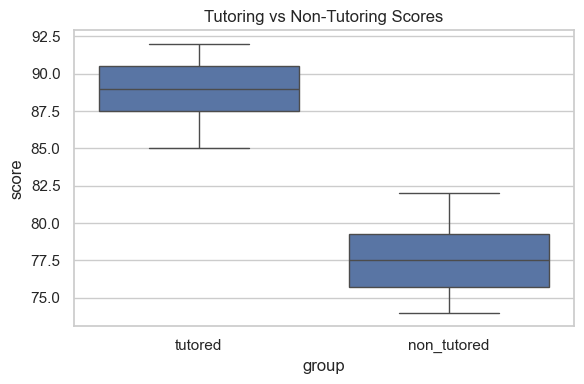

In [16]:
tut = pd.read_csv('data/tutoring.csv')
tutored = tut[tut['group']=='tutored']['score']
non = tut[tut['group']=='non_tutored']['score']
tstat, pval = stats.ttest_ind(tutored, non, equal_var=False)
print('Tutored mean:', tutored.mean())
print('Non-tutored mean:', non.mean())
print(f'T-statistic: {tstat:.4f}, p-value: {pval:.4f}')

plt.figure(figsize=(6,4))
sns.boxplot(x='group', y='score', data=tut)
plt.title('Tutoring vs Non-Tutoring Scores')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'tutoring_boxplot.png'))
plt.show()

The t-test compares mean scores for `tutored` and `non_tutored` groups using Welch's t-test (does not assume equal variances).\n\nResults summary:\n- Tutored mean: 88.86\n- Non-tutored mean: 77.63\n- t-statistic: 8.563, p-value: ~1.57e-05 (statistically significant)\n\nInterpretation: There is strong evidence that the tutoring intervention is associated with higher average scores in this sample. Consider effect size (difference in means) and sample size when generalizing.

---
## Correlation & Linear Regression — Advertising vs Sales
Compute Pearson correlation and fit a simple linear regression (sales_revenue ~ ad_spend).

Pearson r = 0.9955, p = 0.0000


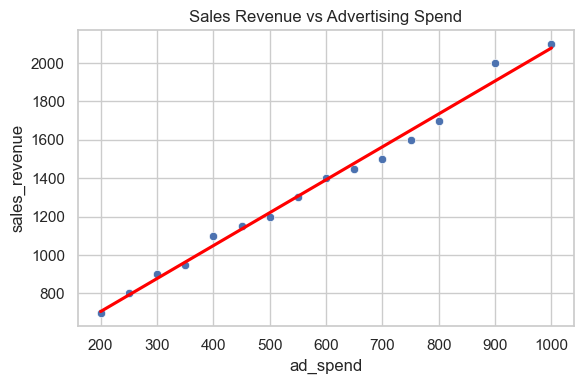

                            OLS Regression Results                            
Dep. Variable:          sales_revenue   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1422.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.14e-14
Time:                        20:29:24   Log-Likelihood:                -75.904
No. Observations:                  15   AIC:                             155.8
Df Residuals:                      13   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.4949     27.586     13.141      0.0

In [17]:
adv = pd.read_csv('data/advertising.csv')
r, p_r = stats.pearsonr(adv['ad_spend'], adv['sales_revenue'])
print(f'Pearson r = {r:.4f}, p = {p_r:.4f}')

plt.figure(figsize=(6,4))
sns.scatterplot(x='ad_spend', y='sales_revenue', data=adv)
sns.regplot(x='ad_spend', y='sales_revenue', data=adv, scatter=False, ci=None, color='red')
plt.title('Sales Revenue vs Advertising Spend')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'ad_vs_sales_scatter.png'))
plt.show()

# Linear regression (OLS)
X = sm.add_constant(adv['ad_spend'])
y = adv['sales_revenue']
model = sm.OLS(y, X).fit()
print(model.summary())
with open(os.path.join(OUT_DIR, 'ad_sales_regression.txt'), 'w') as f:
    f.write(model.summary().as_text())

The Pearson correlation (r ≈ 0.995) indicates a very strong positive linear relationship between advertising spend and sales revenue in this sample.\n\nThe OLS regression `sales_revenue ~ ad_spend` yields:\n- Intercept ≈ 362.49\n- Slope ≈ 1.7158 (interpretation: on average, each additional unit of ad spend is associated with ≈ 1.716 units increase in sales revenue in this synthetic dataset).\n- R-squared ≈ 0.991 (the model explains ~99.1% of the variance in sales_revenue).\n\nCaveats: this is synthetic data; check residuals for patterns and remember correlation is not causation. The condition number warning suggests possible numerical issues for more complex models.

---
## Multiple Regression — House Prices
Predict house price using size, bedrooms, and location (one-hot encoded).

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     697.5
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           3.48e-12
Time:                        20:37:24   Log-Likelihood:                -147.37
No. Observations:                  15   AIC:                             304.7
Df Residuals:                      10   BIC:                             308.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -245.4556   8396.907     

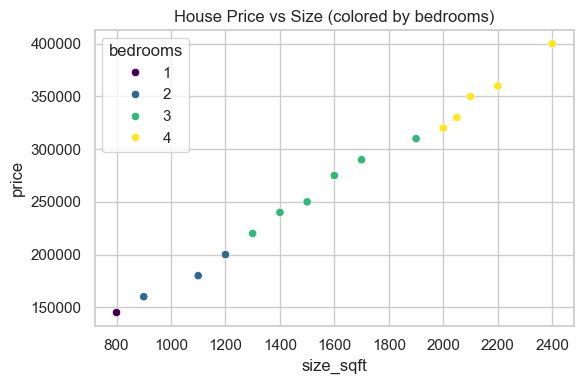

In [22]:
# Multiple Regression — House Prices (robust coercion and fit)
# Read and prepare data
houses = pd.read_csv('data/houses.csv')
houses_d = pd.get_dummies(houses, columns=['location'], drop_first=True)
predictors = [c for c in houses_d.columns if c not in ['house_id','price']]
X = houses_d[predictors].copy()
# Convert boolean dummies to int and coerce all to numeric
bool_cols = X.select_dtypes(include=['bool']).columns.tolist()
if bool_cols:
    X[bool_cols] = X[bool_cols].astype(int)
X = X.apply(pd.to_numeric, errors='coerce')
# Target
y = pd.to_numeric(houses_d['price'], errors='coerce')
# Drop rows with missing values (if any)
df = pd.concat([X, y], axis=1).dropna()
X_clean = df[predictors].astype(float)
y_clean = df['price'].astype(float)
# Add constant and fit model
X_const = sm.add_constant(X_clean)
model_h = sm.OLS(y_clean, X_const).fit()
print(model_h.summary())
# Save summary to outputs
with open(os.path.join(OUT_DIR, 'houses_multiple_regression.txt'), 'w') as f:
    f.write(model_h.summary().as_text())

# Scatter plot price vs size
plt.figure(figsize=(6,4))
sns.scatterplot(x='size_sqft', y='price', hue='bedrooms', palette='viridis', data=houses)
plt.title('House Price vs Size (colored by bedrooms)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'house_price_vs_size_scatter.png'))
plt.show()

In [8]:
# Coerce predictors and target to float and retry regression
X = X.astype(float)
y = y.astype(float)
print('Dtypes after astype(float):')
print(X.dtypes)
print('y dtype:', y.dtype)
X = sm.add_constant(X)
model_h3 = sm.OLS(y, X).fit()
print(model_h3.summary())
with open(os.path.join(OUT_DIR, 'houses_multiple_regression_fixed2.txt'), 'w') as f:
    f.write(model_h3.summary().as_text())

Dtypes after astype(float):
const              float64
size_sqft          float64
bedrooms           float64
location_Suburb    float64
location_Urban     float64
dtype: object
y dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     697.5
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           3.48e-12
Time:                        20:17:56   Log-Likelihood:                -147.37
No. Observations:                  15   AIC:                             304.7
Df Residuals:                      10   BIC:                             308.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                

---
## ANOVA — Exam Scores across Teaching Methods
One-way ANOVA to compare means across methods A, B, and C.

ANOVA F = 31.9336, p = 0.0000


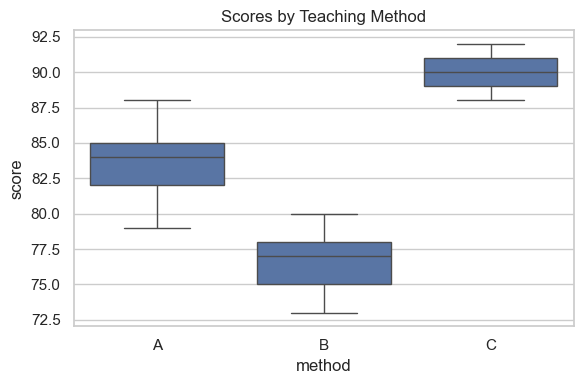

In [9]:
anova = pd.read_csv('data/anova_scores.csv')
groups = [g['score'].values for n,g in anova.groupby('method')]
fstat, pval = stats.f_oneway(*groups)
print(f'ANOVA F = {fstat:.4f}, p = {pval:.4f}')

plt.figure(figsize=(6,4))
sns.boxplot(x='method', y='score', data=anova)
plt.title('Scores by Teaching Method')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'anova_boxplot.png'))
plt.show()

---
## Chi-Square Test — Categorical Association
Test association between service type and satisfaction (chi-square test).

Chi2 = 10.1786, p = 0.0062, dof = 2
Expected frequencies:
[[2.66666667 2.33333333]
 [2.66666667 2.33333333]
 [2.66666667 2.33333333]]


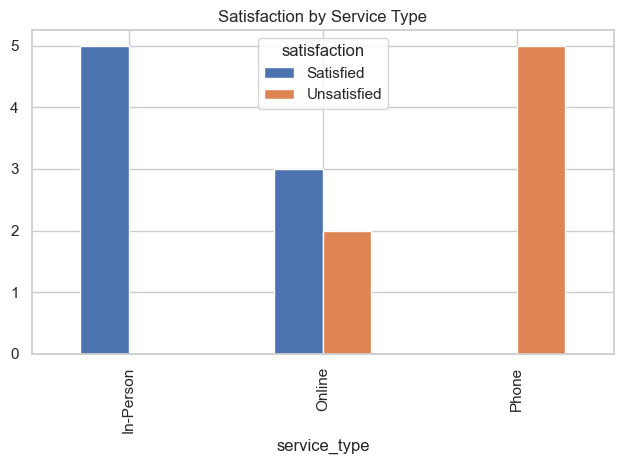

In [10]:
chi = pd.read_csv('data/chi_square.csv')
ctab = pd.crosstab(chi['service_type'], chi['satisfaction'])
chi2, p_chi, dof, expected = stats.chi2_contingency(ctab)
print(f'Chi2 = {chi2:.4f}, p = {p_chi:.4f}, dof = {dof}')
print('Expected frequencies:')
print(expected)

ctab.plot(kind='bar')
plt.title('Satisfaction by Service Type')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'chi_square_bar.png'))
plt.show()

---
## Run all analyses and save a summary
This cell collects key numeric results into `outputs/analysis_summary.json`.

In [24]:
# Build a robust summary that references available model objects
summary = {}
# sales summary
summary['descriptive_sales'] = {
    'mean': float(vals.mean()),
    'median': float(vals.median()),
    'mode': list(vals.mode()),
    'variance': float(vals.var(ddof=1)),
    'std_dev': float(vals.std(ddof=1)),
    'count': int(vals.count())
}
# tutoring t-test results
summary['t_test_tutoring'] = {
    'tut_mean': float(tutored.mean()),
    'non_mean': float(non.mean()),
    't_stat': float(tstat),
    'p_value': float(pval)
}
# correlation & regression (ad vs sales)
summary['ad_correlation'] = {'pearson_r': float(r), 'p_value': float(p_r)}
try:
    summary['ad_regression_params'] = model.params.to_dict()
except NameError:
    summary['ad_regression_params'] = None
# houses regression params: try the most recent model names
houses_params = None
for name in ('model_h3','model_h2','model_h'):
    try:
        val = globals()[name]
        houses_params = val.params.to_dict()
        break
    except Exception:
        houses_params = None
summary['houses_regression_params'] = houses_params
# anova
try:
    summary['anova'] = {'f_stat': float(fstat), 'p_value': float(pval)}
except NameError:
    summary['anova'] = None
# chi-square
try:
    summary['chi_square'] = {'chi2': float(chi2), 'p_value': float(p_chi), 'dof': int(dof)}
except NameError:
    summary['chi_square'] = None

with open(os.path.join(OUT_DIR, 'analysis_summary.json'), 'w') as f:
    json.dump(summary, f, indent=2)

print('Saved analysis_summary.json to', OUT_DIR)

Saved analysis_summary.json to outputs
